## Import Libraries

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.6/799.6 kB 28.9 MB/s eta 0:00:00


In [3]:
import os
import shutil
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.patches as patches
import ultralytics
import yaml

# import warnings
# warnings.filterwarnings("ignore")

## Import Dataset

In [3]:
with open('/kaggle/input/coco-2017-dataset/coco2017/annotations/instances_val2017.json') as val_json:
    val_file = json.load(val_json)

with open('/kaggle/input/coco-2017-dataset/coco2017/annotations/instances_train2017.json') as train_json:
    train_file = json.load(train_json)

In [4]:
val_file.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [5]:
train_file.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [6]:
val_file['images'][0].keys()

dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])

In [7]:
train_file['images'][0].keys()

dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])

In [8]:
val_file['images'][0]

{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133}

In [9]:
val_file['annotations'][0].keys()

dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])

In [10]:
train_file['annotations'][0].keys()

dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])

In [11]:
val_file['annotations'][0]

{'segmentation': [[510.66,
   423.01,
   511.72,
   420.03,
   510.45,
   416.0,
   510.34,
   413.02,
   510.77,
   410.26,
   510.77,
   407.5,
   510.34,
   405.16,
   511.51,
   402.83,
   511.41,
   400.49,
   510.24,
   398.16,
   509.39,
   397.31,
   504.61,
   399.22,
   502.17,
   399.64,
   500.89,
   401.66,
   500.47,
   402.08,
   499.09,
   401.87,
   495.79,
   401.98,
   490.59,
   401.77,
   488.79,
   401.77,
   485.39,
   398.58,
   483.9,
   397.31,
   481.56,
   396.35,
   478.48,
   395.93,
   476.68,
   396.03,
   475.4,
   396.77,
   473.92,
   398.79,
   473.28,
   399.96,
   473.49,
   401.87,
   474.56,
   403.47,
   473.07,
   405.59,
   473.39,
   407.71,
   476.68,
   409.41,
   479.23,
   409.73,
   481.56,
   410.69,
   480.4,
   411.85,
   481.35,
   414.93,
   479.86,
   418.65,
   477.32,
   420.03,
   476.04,
   422.58,
   479.02,
   422.58,
   480.29,
   423.01,
   483.79,
   419.93,
   486.66,
   416.21,
   490.06,
   415.57,
   492.18,
   416.85,

In [12]:
val_file['categories'][0].keys()

dict_keys(['supercategory', 'id', 'name'])

In [13]:
val_file['categories']

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

## Data Preprocessing and Preparation

In [14]:
val_anno_df = []
for x in range(len(val_file['annotations'])):
    val_anno_df.append([val_file['annotations'][x]['image_id'], 
                        val_file['annotations'][x]['bbox'], 
                        val_file['annotations'][x]['iscrowd'],
                        val_file['annotations'][x]['category_id'], 
                        val_file['annotations'][x]['id']
                       ])
val_anno_df = pd.DataFrame(val_anno_df, columns = ['image_id', 'bbox', 'iscrowd', 'category_id', 'id'])
val_anno_df.head()

,image_id,bbox,iscrowd,category_id,id
0,289343,"[473.07, 395.93, 38.65, 28.67]",0,18,1768
1,61471,"[272.1, 200.23, 151.97, 279.77]",0,18,1773
2,472375,"[124.71, 196.18, 372.85, 356.81]",0,18,2551
3,520301,"[112.71, 154.82, 367.29, 479.35]",0,18,3186
4,579321,"[200.61, 89.65, 400.22, 251.02]",0,18,3419


In [15]:
val_im_df = []
for x in range(len(val_file['images'])):
    val_im_df.append([val_file['images'][x]['id'], val_file['images'][x]['file_name'], val_file['images'][x]['height'], val_file['images'][x]['width']])
val_im_df = pd.DataFrame(val_im_df, columns = ['image_id', 'file_name', 'height', 'width'])
val_im_df.head()

,image_id,file_name,height,width
0,397133,000000397133.jpg,427,640
1,37777,000000037777.jpg,230,352
2,252219,000000252219.jpg,428,640
3,87038,000000087038.jpg,480,640
4,174482,000000174482.jpg,388,640


,image_id,file_name,height,width
0,397133,000000397133.jpg,427,640
1,37777,000000037777.jpg,230,352
2,252219,000000252219.jpg,428,640
3,87038,000000087038.jpg,480,640
4,174482,000000174482.jpg,388,640


In [16]:
val_df = pd.merge(val_anno_df[val_anno_df['category_id'] == 1], val_im_df, how = 'inner', on = 'image_id')
val_df.sort_values('file_name').head()

,image_id,bbox,iscrowd,category_id,id,file_name,height,width
7221,139,"[384.43, 172.21, 15.12, 35.74]",0,1,233201,000000000139.jpg,426,640
7217,139,"[412.8, 157.61, 53.05, 138.01]",0,1,230831,000000000139.jpg,426,640
4875,785,"[280.79, 44.73, 218.7, 346.68]",0,1,442619,000000000785.jpg,425,640
8830,872,"[145.26, 100.67, 291.95, 457.35]",0,1,559508,000000000872.jpg,640,621
8834,872,"[163.73, 126.42, 265.69, 480.4]",0,1,560228,000000000872.jpg,640,621


In [17]:
val_df.image_id.nunique()

2693

In [18]:
train_anno_df = []
for x in range(len(train_file['annotations'])):
    train_anno_df.append([train_file['annotations'][x]['image_id'], 
                          train_file['annotations'][x]['bbox'], 
                          train_file['annotations'][x]['iscrowd'],
                          train_file['annotations'][x]['category_id'], 
                          train_file['annotations'][x]['id']])
train_anno_df = pd.DataFrame(train_anno_df, columns = ['image_id', 'bbox', 'iscrowd', 'category_id', 'id'])
train_anno_df.head()

,image_id,bbox,iscrowd,category_id,id
0,558840,"[199.84, 200.46, 77.71, 70.88]",0,58,156
1,200365,"[234.22, 317.11, 149.39, 38.55]",0,58,509
2,200365,"[239.48, 347.87, 160.0, 57.81]",0,58,603
3,200365,"[296.65, 388.33, 1.03, 0.0]",0,58,918
4,200365,"[251.87, 333.42, 125.94, 22.71]",0,58,1072


In [19]:
train_im_df = []
for x in range(len(train_file['images'])):
    train_im_df.append([train_file['images'][x]['id'], train_file['images'][x]['file_name'], train_file['images'][x]['height'], train_file['images'][x]['width']])
train_im_df = pd.DataFrame(train_im_df, columns = ['image_id', 'file_name', 'height', 'width'])
train_im_df.head()

,image_id,file_name,height,width
0,391895,000000391895.jpg,360,640
1,522418,000000522418.jpg,480,640
2,184613,000000184613.jpg,336,500
3,318219,000000318219.jpg,640,556
4,554625,000000554625.jpg,640,426


In [20]:
train_df = pd.merge(train_anno_df[train_anno_df['category_id'] == 1], train_im_df, how = 'inner', on = 'image_id')
train_df.head()

,image_id,bbox,iscrowd,category_id,id,file_name,height,width
0,537548,"[267.03, 104.32, 229.19, 320.0]",0,1,183020,000000537548.jpg,480,640
1,117891,"[206.77, 1.44, 433.23, 408.73]",0,1,183030,000000117891.jpg,427,640
2,120021,"[276.12, 0.29, 61.18, 118.73]",0,1,183050,000000120021.jpg,480,640
3,403255,"[355.87, 118.43, 30.84, 42.87]",0,1,183057,000000403255.jpg,384,640
4,209468,"[178.38, 120.54, 114.59, 354.6]",0,1,183062,000000209468.jpg,480,640


In [21]:
train_df.image_id.nunique()

64115

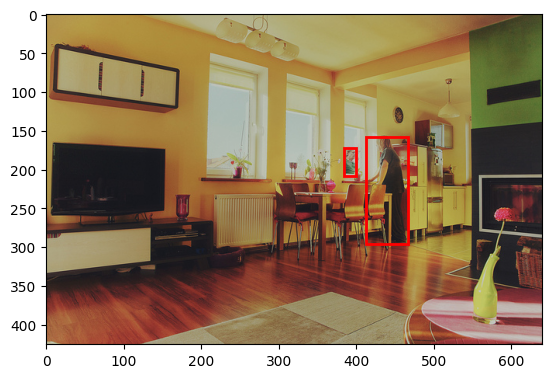

In [22]:
opened_im = '000000000139.jpg'#'000000000872.jpg'
fig, ax = plt.subplots()
image = img.imread(os.path.join('/kaggle/input/coco-2017-dataset/coco2017/val2017', opened_im))
plt.imshow(image)
for i in range(len(val_df[val_df["file_name"]==opened_im]['bbox'])):
    x, y, w, h = val_df[val_df["file_name"]==opened_im]['bbox'].iloc[i]#.item()
    rect = patches.Rectangle((x, y), w, h, fill=False, color='red', linewidth=2)
    ax.add_patch(rect)
plt.show()

## Folders Preparation

In [23]:
os.makedirs('/kaggle/working/COCOPerson/train/images')
os.makedirs('/kaggle/working/COCOPerson/train/labels')
os.makedirs('/kaggle/working/COCOPerson/validation/images')
os.makedirs('/kaggle/working/COCOPerson/validation/labels')

In [24]:
val_image_list = list(set(val_df["file_name"]))
val_image_list.sort()
# val_image_list
init_val_dir = '/kaggle/input/coco-2017-dataset/coco2017/val2017'
target_val_dir = '/kaggle/working/COCOPerson/validation'
for img_filename in val_image_list[:1000]:
    shutil.copy(os.path.join(init_val_dir, img_filename), os.path.join(target_val_dir, "images", img_filename))
    with open(os.path.join(target_val_dir, "labels", "{}.txt".format(img_filename[:-4])), 'w') as f:
        for i in range(len(val_df[val_df["file_name"]==img_filename]['bbox'])):
            x, y, w, h = val_df[val_df["file_name"]==img_filename]['bbox'].iloc[i]
            im_height = val_df[val_df["file_name"]==img_filename]['height'].iloc[i]
            im_width = val_df[val_df["file_name"]==img_filename]['width'].iloc[i]
            f.write("0 {} {} {} {}\n".format((x+0.5*w)/im_width, (y+0.5*h)/im_height, w/im_width, h/im_height))

In [25]:
train_image_list = list(set(train_df["file_name"]))
train_image_list.sort()
init_train_dir = '/kaggle/input/coco-2017-dataset/coco2017/train2017'
target_train_dir = '/kaggle/working/COCOPerson/train'
for img_filename in train_image_list[:7500]:
    shutil.copy(os.path.join(init_train_dir, img_filename), os.path.join(target_train_dir, "images", img_filename))
    with open(os.path.join(target_train_dir, "labels", "{}.txt".format(img_filename[:-4])), 'w') as f:
        for i in range(len(train_df[train_df["file_name"]==img_filename]['bbox'])):
            x, y, w, h = train_df[train_df["file_name"]==img_filename]['bbox'].iloc[i]
            im_height = train_df[train_df["file_name"]==img_filename]['height'].iloc[i]
            im_width = train_df[train_df["file_name"]==img_filename]['width'].iloc[i]
            f.write("0 {} {} {} {}\n".format((x+0.5*w)/im_width, (y+0.5*h)/im_height, w/im_width, h/im_height))

In [26]:
with open("/kaggle/working/COCOPerson/data.yaml", "w") as file:
    yaml.dump({
        "train": '/kaggle/working/COCOPerson/train',
#         "test": '/kaggle/input/coco-2017-dataset/coco2017/test2017',
        "val": '/kaggle/working/COCOPerson/validation',
        "nc": 1,
        "names": ['person']
    }, stream=file, default_flow_style=None)

In [27]:
# %load_ext tensorboard
# %tensorboard --logdir path/to/runs

In [28]:
ultralytics.checks()

Ultralytics YOLOv8.2.50 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5689.4/8062.4 GB disk)


In [29]:
# !yolo task=detect mode=train model=yolov8m.pt data=/kaggle/working/COCOPerson/data.yaml epochs=1 imgsz=640

from ultralytics import YOLO
# Load a pre-trained model 
model = YOLO('yolov8m.pt')

# Train the model 
results = model.train(data='/kaggle/working/COCOPerson/data.yaml', epochs=50, batch = 32, imgsz=640, device = [0,1] , workers = 8, pretrained = True, optimizer = 'SGD', lr0 = 0.005, momentum = 0.9) # argumen tinggal tambah

100%|██████████| 49.7M/49.7M [00:00<00:00, 263MB/s]


Ultralytics YOLOv8.2.50 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
                                                      CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/COCOPerson/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1], workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

100%|██████████| 755k/755k [00:00<00:00, 18.6MB/s]
2024-07-07 15:56:18,748	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-07 15:56:20,798	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 109MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/COCOPerson/train/labels... 7500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7500/7500 [00:06<00:00, 1199.19it/s]


train: New cache created: /kaggle/working/COCOPerson/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/COCOPerson/validation/labels... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<00:00, 1282.04it/s]


val: New cache created: /kaggle/working/COCOPerson/validation/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.005, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.56G     0.9425     0.9951      1.116         40        640: 100%|██████████| 235/235 [02:04<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:13<00:00,  2.43it/s]


                   all       1000       4308      0.796      0.715      0.798      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.27G     0.9495     0.7366      1.115         47        640: 100%|██████████| 235/235 [02:02<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]


                   all       1000       4308      0.807      0.696      0.795      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.42G     0.9908     0.7733      1.127         49        640: 100%|██████████| 235/235 [02:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]


                   all       1000       4308      0.778      0.684      0.763      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.32G      1.043     0.8413      1.158         47        640: 100%|██████████| 235/235 [02:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]


                   all       1000       4308      0.788      0.637      0.738        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.43G      1.035     0.8376      1.163         11        640: 100%|██████████| 235/235 [02:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]


                   all       1000       4308      0.775      0.665      0.748      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.29G      1.031     0.8313      1.165         40        640: 100%|██████████| 235/235 [02:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]


                   all       1000       4308      0.795      0.656      0.753      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.39G       1.02     0.8189      1.154         35        640: 100%|██████████| 235/235 [02:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]


                   all       1000       4308      0.792      0.644      0.749      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.29G      1.025     0.8081      1.146         60        640: 100%|██████████| 235/235 [02:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]


                   all       1000       4308      0.767      0.657      0.747      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.41G     0.9952     0.7909      1.142         41        640: 100%|██████████| 235/235 [02:00<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]


                   all       1000       4308      0.768      0.664       0.75      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.31G     0.9897     0.7825      1.143         25        640: 100%|██████████| 235/235 [02:00<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]


                   all       1000       4308      0.804      0.652      0.761      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.38G     0.9831     0.7725      1.134         39        640: 100%|██████████| 235/235 [02:00<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]


                   all       1000       4308      0.794      0.675      0.765      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.31G     0.9761     0.7626      1.133         48        640: 100%|██████████| 235/235 [02:00<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       1000       4308      0.806      0.646       0.75      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.38G     0.9818     0.7645      1.134         48        640: 100%|██████████| 235/235 [02:00<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]


                   all       1000       4308      0.793      0.682      0.769      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.28G     0.9689     0.7384      1.119         51        640: 100%|██████████| 235/235 [02:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.96it/s]


                   all       1000       4308      0.791       0.67      0.762      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.36G     0.9468     0.7303      1.105         37        640: 100%|██████████| 235/235 [02:00<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]


                   all       1000       4308      0.789      0.661      0.759      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.26G     0.9525     0.7289      1.107         27        640: 100%|██████████| 235/235 [02:00<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]


                   all       1000       4308      0.798      0.669      0.764      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.37G     0.9317     0.7055      1.096         32        640: 100%|██████████| 235/235 [02:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]


                   all       1000       4308      0.785      0.668      0.759      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.31G     0.9427     0.7145      1.106         67        640: 100%|██████████| 235/235 [02:00<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]


                   all       1000       4308      0.805      0.656      0.764      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.42G     0.9223     0.6962      1.093         44        640: 100%|██████████| 235/235 [02:00<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.87it/s]


                   all       1000       4308      0.788       0.68      0.771      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.31G     0.9165     0.6929      1.091         28        640: 100%|██████████| 235/235 [02:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]


                   all       1000       4308      0.767      0.695       0.77      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.39G     0.9154     0.6784      1.095         65        640: 100%|██████████| 235/235 [02:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]


                   all       1000       4308      0.794      0.682      0.772      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.28G     0.8998     0.6697      1.081         48        640: 100%|██████████| 235/235 [02:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]


                   all       1000       4308      0.793      0.683      0.771      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.39G     0.9051     0.6594      1.083         67        640: 100%|██████████| 235/235 [02:00<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]


                   all       1000       4308      0.781      0.693      0.773      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.25G     0.8855     0.6434      1.072         46        640: 100%|██████████| 235/235 [02:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]


                   all       1000       4308      0.777      0.692      0.772      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.37G     0.8876     0.6488      1.073         58        640: 100%|██████████| 235/235 [02:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]


                   all       1000       4308      0.807      0.672      0.773      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       7.3G     0.8755     0.6281      1.064         47        640: 100%|██████████| 235/235 [02:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]


                   all       1000       4308      0.788      0.693      0.781      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.41G     0.8783     0.6347      1.065         13        640: 100%|██████████| 235/235 [02:00<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]


                   all       1000       4308      0.791      0.692      0.775      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.32G     0.8606     0.6217      1.057         51        640: 100%|██████████| 235/235 [02:00<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]


                   all       1000       4308      0.788      0.691      0.774      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.36G     0.8594     0.6121      1.053         66        640: 100%|██████████| 235/235 [02:00<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]


                   all       1000       4308      0.804      0.683      0.772       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.32G     0.8431      0.595      1.045         62        640: 100%|██████████| 235/235 [02:00<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.96it/s]


                   all       1000       4308      0.795      0.696      0.777      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.35G     0.8423     0.5931      1.041         25        640: 100%|██████████| 235/235 [02:00<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.89it/s]


                   all       1000       4308      0.794      0.686      0.771      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       7.3G     0.8291     0.5875      1.039         36        640: 100%|██████████| 235/235 [02:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.90it/s]


                   all       1000       4308      0.804      0.682      0.773      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.35G     0.8391     0.5872      1.047         61        640: 100%|██████████| 235/235 [02:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.95it/s]


                   all       1000       4308      0.792      0.691      0.771      0.538


  0%|          | 0/235 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.28G     0.8278     0.5704      1.042         44        640: 100%|██████████| 235/235 [02:00<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]


                   all       1000       4308      0.793      0.688      0.775      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.38G     0.8267     0.5711      1.042         67        640: 100%|██████████| 235/235 [02:00<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.95it/s]


                   all       1000       4308       0.79      0.687      0.772      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.31G     0.8172     0.5671      1.037         54        640: 100%|██████████| 235/235 [02:00<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.88it/s]


                   all       1000       4308      0.792      0.686      0.772      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.41G     0.8092     0.5496      1.026         32        640: 100%|██████████| 235/235 [02:00<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.96it/s]


                   all       1000       4308      0.791      0.694      0.775      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.26G     0.8065     0.5505       1.03         43        640: 100%|██████████| 235/235 [02:00<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]


                   all       1000       4308       0.78       0.71      0.778      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.37G     0.7995      0.543      1.023         26        640: 100%|██████████| 235/235 [02:00<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]


                   all       1000       4308      0.794       0.69      0.777      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.26G     0.7875     0.5467      1.019         19        640: 100%|██████████| 235/235 [02:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.86it/s]


                   all       1000       4308      0.793      0.695      0.777      0.541
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.38G     0.7409      0.454     0.9661         26        640: 100%|██████████| 235/235 [02:01<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]


                   all       1000       4308      0.802      0.688      0.773       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.28G     0.7298     0.4445      0.956         26        640: 100%|██████████| 235/235 [02:00<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.94it/s]


                   all       1000       4308      0.802      0.687      0.768      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.38G     0.7284      0.438     0.9505         38        640: 100%|██████████| 235/235 [02:00<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.94it/s]


                   all       1000       4308      0.813      0.687      0.774      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.26G     0.7204      0.433     0.9524         31        640: 100%|██████████| 235/235 [02:00<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.96it/s]


                   all       1000       4308      0.821      0.681      0.775      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.39G     0.7097     0.4246     0.9512         11        640: 100%|██████████| 235/235 [02:00<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.94it/s]


                   all       1000       4308      0.803      0.697      0.772      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.28G     0.7069     0.4142      0.946         17        640: 100%|██████████| 235/235 [01:59<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]


                   all       1000       4308      0.798      0.694      0.772       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.34G     0.7041     0.4148     0.9455         39        640: 100%|██████████| 235/235 [02:00<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]


                   all       1000       4308      0.781      0.702       0.77       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.29G     0.6949     0.4023     0.9472         24        640: 100%|██████████| 235/235 [01:59<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.91it/s]


                   all       1000       4308      0.791      0.689      0.771      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.38G     0.6872     0.3967     0.9359         19        640: 100%|██████████| 235/235 [02:00<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.97it/s]


                   all       1000       4308        0.8      0.691       0.77      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.28G     0.6826     0.3954     0.9349         33        640: 100%|██████████| 235/235 [01:59<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.96it/s]


                   all       1000       4308      0.793      0.692      0.769      0.541

50 epochs completed in 1.853 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.50 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
                                                      CUDA:1 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:15<00:00,  2.13it/s]


                   all       1000       4308        0.8      0.712      0.798      0.572
Speed: 0.1ms preprocess, 6.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


## Predict

In [10]:
from ultralytics import YOLO
model = YOLO('/kaggle/input/yolov8m_person_retrained/pytorch/50epoch_best/1/best.pt')
test_img_name_list = os.listdir('/kaggle/input/coco-2017-dataset/coco2017/test2017')[:10]
test_img_list = []
for i in test_img_name_list:
    test_img_list.append(os.path.join('/kaggle/input/coco-2017-dataset/coco2017/test2017', i))
    
results = model(test_img_list)


0: 640x640 (no detections), 25.4ms
1: 640x640 2 persons, 25.4ms
2: 640x640 (no detections), 25.4ms
3: 640x640 2 persons, 25.4ms
4: 640x640 1 person, 25.4ms
5: 640x640 5 persons, 25.4ms
6: 640x640 2 persons, 25.4ms
7: 640x640 (no detections), 25.4ms
8: 640x640 (no detections), 25.4ms
9: 640x640 (no detections), 25.4ms
Speed: 2.1ms preprocess, 25.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


In [4]:
from ultralytics import YOLO
model = YOLO('/kaggle/input/yolov8m_person_retrained/pytorch/50epoch_best/1/best.pt')
source = 'https://www.youtube.com/watch?v=HBowpU_isGA'
results = model(source)


requirements: Ultralytics requirement ['pytube'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 17.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 11.7s, installed 1 package: ['pytube']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

1/1: https://www.youtube.com/watch?v=HBowpU_isGA... Success ✅ (2997 frames of shape 1920x1080 at 29.97 FPS)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 384x640 13 persons, 2949.2m

error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:1367: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [6]:
# test_img_list

['/kaggle/input/coco-2017-dataset/coco2017/test2017/000000355443.jpg',
 '/kaggle/input/coco-2017-dataset/coco2017/test2017/000000081349.jpg',
 '/kaggle/input/coco-2017-dataset/coco2017/test2017/000000436639.jpg',
 '/kaggle/input/coco-2017-dataset/coco2017/test2017/000000210548.jpg',
 '/kaggle/input/coco-2017-dataset/coco2017/test2017/000000196829.jpg',
 '/kaggle/input/coco-2017-dataset/coco2017/test2017/000000443791.jpg',
 '/kaggle/input/coco-2017-dataset/coco2017/test2017/000000114065.jpg',
 '/kaggle/input/coco-2017-dataset/coco2017/test2017/000000224870.jpg',
 '/kaggle/input/coco-2017-dataset/coco2017/test2017/000000413670.jpg',
 '/kaggle/input/coco-2017-dataset/coco2017/test2017/000000235666.jpg']

In [14]:
# from PIL import Image
# # Visualize the results
# for i, r in enumerate(results):
#     # Plot results image
#     im_bgr = r.plot(pil = True)  # BGR-order numpy array
#     im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

# #     # Show results to screen (in supported environments)
# #     r.show()

#     # Save results to disk
#     r.save(filename=f"results{i}.jpg")

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]
Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/tmp76knhqpk.PNG'
Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/tmpefah0glr.PNG'
Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg

In [17]:
i = 0
for result in results:
    i += 1
    boxes = result.boxes  # Boxes object for bounding box outputs
#     masks = result.masks  # Masks object for segmentation masks outputs
#     keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
#     obb = result.obb  # Oriented boxes object for OBB outputs
#     result.show()  # display to screen
    result.save(filename="result_{}.jpg".format(i))  # save to disk

In [7]:
i = 0
for result in results:
    i += 1
    boxes = result.boxes  # Boxes object for bounding box outputs
#     masks = result.masks  # Masks object for segmentation masks outputs
#     keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
#     obb = result.obb  # Oriented boxes object for OBB outputs
#     result.show()  # display to screen
    result.save(filename="result_{}.mp4".format(i))  # save to disk


requirements: Ultralytics requirement ['pytube'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 998.4 kB/s eta 0:00:000:00:01

requirements: AutoUpdate success ✅ 11.8s, installed 1 package: ['pytube']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

1/1: https://www.youtube.com/watch?v=HBowpU_isGA... Success ✅ (2997 frames of shape 1920x1080 at 29.97 FPS)

0: 384x640 1 person, 2977.4ms


error: OpenCV(4.10.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:708: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'imwrite_'
